# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 101)

In [2]:
xqrs = pd.read_csv('../to_csv/final_dataset/xqrs_filtered.csv')
xqrs.head()

,Key,hf,lf_hf_ratio,vlf,max_hr,lf,cvi,sd1,min_hr,sd2,sampen,median_nni,mean_hr,mean_nni,csi,Modified_csi,label
0,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,127.118644,NaN,NaN,NaN,105.633803,NaN,NaN,506.0,118.490493,507.8,NaN,NaN,0.000
1,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,118.110236,NaN,NaN,504.0,119.049198,504.0,NaN,NaN,0.016
2,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,118.110236,NaN,NaN,502.0,119.532917,502.0,NaN,NaN,1.000
3,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,116.279070,NaN,NaN,512.0,117.713266,509.8,NaN,NaN,1.000
4,train_01_tcp_ar_7793_s001_2011_05_27_t001,NaN,NaN,NaN,120.967742,NaN,NaN,NaN,118.110236,NaN,NaN,504.0,118.816291,505.0,NaN,NaN,1.000


In [3]:
xqrs.dropna(subset=['label'], inplace=True)

In [4]:
xqrs_filtered = xqrs.replace([np.inf, -np.inf], np.nan)

In [5]:
xqrs_clean_imputed = xqrs_filtered.groupby(xqrs_filtered['Key']).transform(lambda x: x.fillna(x.mean()))
xqrs_clean_imputed.insert(0, 'Key', xqrs_filtered.Key)
xqrs_clean_imputed = xqrs_clean_imputed.reset_index().drop(['index'], axis=1)

In [6]:
xqrs_clean_imputed.label = xqrs_clean_imputed.label.apply(lambda x: 1 if x != 0 else 0)

In [7]:
xqrs_clean_imputed.label.value_counts(normalize=True) * 100

0    78.962187
1    21.037813
Name: label, dtype: float64

In [8]:
xqrs_clean_imputed[xqrs_clean_imputed.isnull().any(axis=1)].Key.unique()

array([], dtype=object)

In [9]:
from functions import series_to_supervised, supervised_by_exam

In [10]:
xqrs_clean_lag_10 = supervised_by_exam(xqrs_clean_imputed, 1)
xqrs_clean_lag_120 = supervised_by_exam(xqrs_clean_imputed, 12)

In [11]:
xqrs_clean_lag_240 = supervised_by_exam(xqrs_clean_imputed, 24)

In [12]:
xqrs_clean_lag_60 = supervised_by_exam(xqrs_clean_imputed, 6)
xqrs_clean_lag_30 = supervised_by_exam(xqrs_clean_imputed, 3)

In [13]:
import re

def reg(text):
    r = re.search(r'_(\d+)_s', text)
    if r:
        return r.group(1)

In [14]:
patients = set(xqrs_clean_imputed.Key.apply(reg))
len(patients)

59

# Vizualisations

## Patient 6175

### First test no lag

In [15]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('6175')].groupby('Key').agg('count')

,hf,lf_hf_ratio,vlf,max_hr,lf,cvi,sd1,min_hr,sd2,sampen,median_nni,mean_hr,mean_nni,csi,Modified_csi,label
Key,,,,,,,,,,,,,,,,
train_01_tcp_ar_6175_s002_2011_04_28_t000,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
train_03_tcp_ar_a_6175_s003_2011_04_28_t000,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
train_03_tcp_ar_a_6175_s003_2011_04_28_t001,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
train_03_tcp_ar_a_6175_s003_2011_04_28_t002,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
train_03_tcp_ar_a_6175_s003_2011_04_28_t003,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
train_03_tcp_ar_a_6175_s003_2011_04_28_t004,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
train_03_tcp_ar_a_6175_s003_2011_04_28_t005,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
train_03_tcp_ar_a_6175_s003_2011_04_28_t006,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
train_03_tcp_ar_a_6175_s003_2011_04_28_t007,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60


In [16]:
test_exam = 'train_03_tcp_ar_a_6175_s003_2011_04_28_t001'

In [17]:
test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains('6175')) & (xqrs_clean_imputed.Key != test_exam)]

In [18]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('6175')].shape

(540, 17)

In [19]:
test_data.shape

(480, 17)

In [29]:
from functions import simple_ml

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from xgboost import XGBClassifier

In [32]:
score, model = simple_ml(test_data, XGBClassifier())

In [33]:
preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].iloc[:, 1:-1])

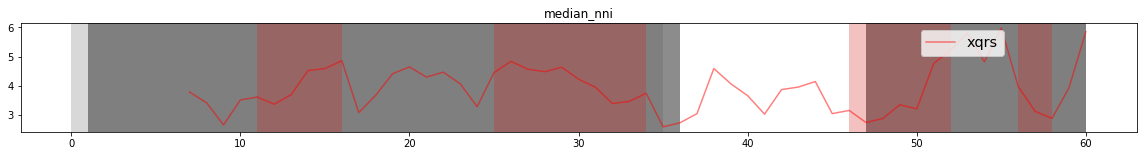

In [34]:
XQRS_FEATS_FILE = "../feats-v0_4/train/03_tcp_ar_a/061/00006175/s003_2011_04_28/00006175_s003_t001-xqrs.json"

xqrs_data = json.load(open(XQRS_FEATS_FILE, "r"))
xqrs_features = np.array(xqrs_data["features"])
xqrs_features_tp = np.transpose(xqrs_features)

plt.figure(1, figsize = (20,2))
plt.title(xqrs_data["keys"][10])
plt.plot(xqrs_features_tp[22], color='red', alpha=0.5, label="xqrs")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

for j in range(0, len(xqrs_features_tp[29])-1):
    plt.axvspan(j, (j + 1), facecolor='black', alpha=0.5 * xqrs_features_tp[29][j])
    plt.axvspan(j, (j + 1), facecolor='red', alpha=0.2 * preds[j])
plt.plot()
plt.show()

In [27]:
import plotly.express as px

In [35]:
fig = px.line(xqrs_features_tp[22])
fig.show()

(-0.05, 1.05)

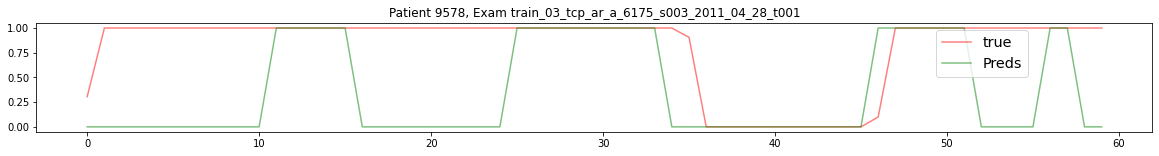

In [26]:
plt.figure(1, figsize = (20,2))

plt.title('Patient 9578, Exam %s' % test_exam)
plt.plot(xqrs_features_tp[29], color='red', alpha=0.5, label="true")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
plt.ylim()

### 2nd test -> 60 lag

In [69]:
test_data_lag = xqrs_clean_lag_60[(xqrs_clean_lag_60.Key.str.contains('6175')) & (xqrs_clean_lag_60.Key != test_exam)]

In [70]:
test_data_lag.shape

(432, 107)

In [71]:
score, model = simple_ml(test_data_lag, XGBClassifier())

In [72]:
preds = model.predict(xqrs_clean_lag_60[xqrs_clean_lag_60.Key == test_exam].iloc[:, 1:-1])

In [73]:
len(xqrs_features_tp[29])

61

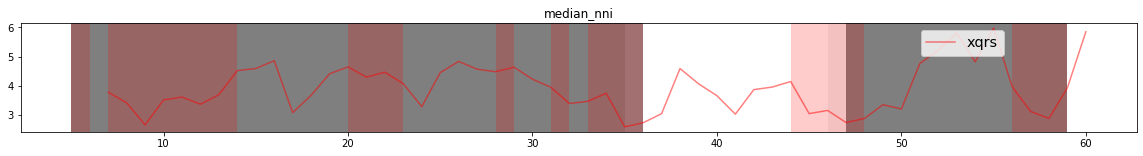

In [75]:
XQRS_FEATS_FILE = "../feats-v0_4/train/03_tcp_ar_a/061/00006175/s003_2011_04_28/00006175_s003_t001-xqrs.json"

xqrs_data = json.load(open(XQRS_FEATS_FILE, "r"))
xqrs_features = np.array(xqrs_data["features"])
xqrs_features_tp = np.transpose(xqrs_features)

plt.figure(1, figsize = (20,2))
plt.title(xqrs_data["keys"][10])
plt.plot(xqrs_features_tp[22], color='red', alpha=0.5, label="xqrs")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

for j, z in zip(range(5, len(xqrs_features_tp[29])-1), range(0, len(preds))):
    plt.axvspan(j, (j + 1), facecolor='black', alpha=0.5 * xqrs_features_tp[29][j])
    plt.axvspan(j, (j + 1), facecolor='red', alpha=0.2 * preds[z])
plt.plot()
plt.show()

(-0.05, 1.05)

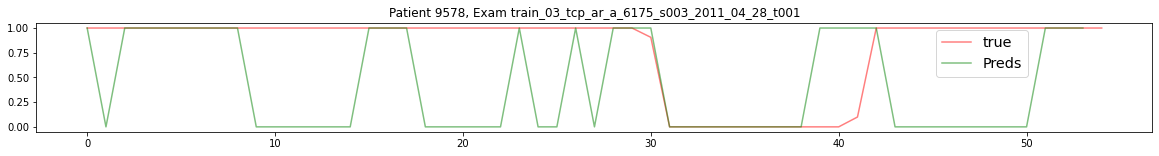

In [76]:
plt.figure(1, figsize = (20,2))

plt.title('Patient 9578, Exam %s' % test_exam)
plt.plot(xqrs_features_tp[29][5:], color='red', alpha=0.5, label="true")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
plt.ylim()

31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
28 ectopic beat(s) have been deleted with malik rule.
31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
52 ectopic beat(s) have been deleted with acar rule.


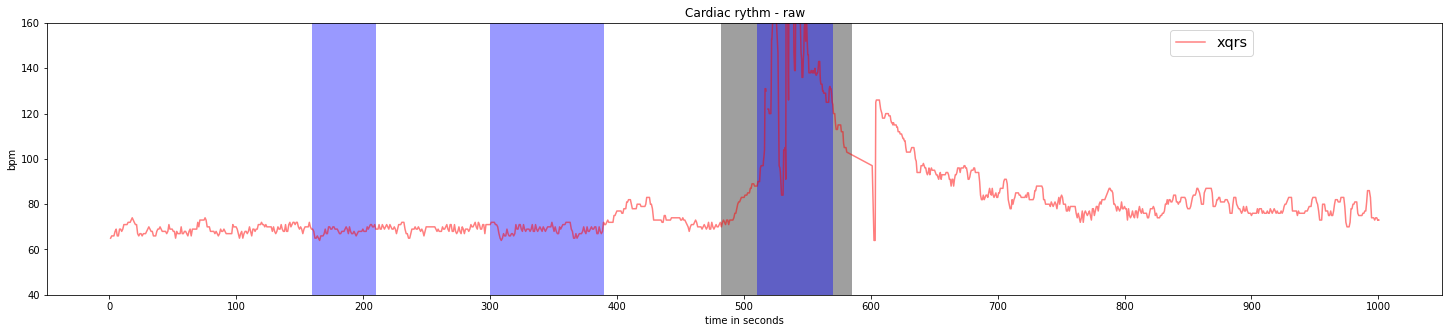

In [36]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy.signal as signal
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values


def get_clean_intervals(rrs, method="malik"):
    # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rrs,
                                                    low_rri=300, high_rri=1800)
    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                       interpolation_method="linear")

    # This remove ectopic beats from signal
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method=method)
    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
    return interpolated_nn_intervals

def to_hr(rr_intervals):
    hr = np.zeros(len(rr_intervals))
    for i in range(0, len(rr_intervals)):
        if math.isnan(rr_intervals[i]):
            hr[i] = np.nan
        else:
            hr[i] = (int)(60 * 1000 / rr_intervals[i])

    return hr

ECG_FILE ="../res-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"
ANNOTATIONS_FILE = "../annot-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"

try:
    data = json.load(open(ECG_FILE, "r"))
    annotations = json.load(open(ANNOTATIONS_FILE, "r"))

    timestamps = {}
    timestamps["xqrs"] = []

    for key in timestamps.keys():
        timestamps[key] = np.cumsum(data[key]["rr_intervals"][1:])
        timestamps[key] = np.append(timestamps[key], timestamps[key][-2])
        timestamps[key] *= 0.001


    clean_rr_intervals = {}
    clean_rr_intervals["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"])

    clean_hr = {}
    clean_hr["xqrs"] = to_hr(clean_rr_intervals["xqrs"])

    hr_median ={}
    hr_median["xqrs"] = signal.medfilt(clean_hr["xqrs"], 5)

    clean_rr_intervals_acar = {}
    clean_rr_intervals_acar["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"], method="acar")

    clean_hr_acar = {}
    clean_hr_acar["xqrs"] = to_hr(clean_rr_intervals_acar["xqrs"])
    
    #Raw RR intervals
    plt.figure(1, figsize = (25,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - raw")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.xticks(np.arange(0, 1001, 100))
    #plt.plot(timestamps["xqrs"], data["xqrs"]["hr"], color='red', alpha=0.5, label="xqrs")
    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color='red', alpha=0.5, label="xqrs")
    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)

    for z, j in enumerate(range(50, len(preds)*10, 10)):
        plt.axvspan(j, (j + 10), facecolor='blue', alpha=0.4 * preds[z])
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
    plt.show()
except Exception as e:
    print(e)
    print("Error")

In [35]:
'''
    # Clean  RR intervals with Acar method
    plt.figure(1, figsize = (20,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - ACAR cleaning method")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.plot(timestamps["xqrs"], clean_hr_acar["xqrs"], color='red', alpha=0.5, label="xqrs")
    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)
    plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
    plt.show()
    
    # Clean RR intervals with Malik + median filter
    plt.figure(1, figsize = (20,5))
    plt.ylim((40, 160))
    plt.title("Cardiac rythm - Malik cleaning method + median filter")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color='red', alpha=0.5, label="xqrs")
'''

'\n    # Clean  RR intervals with Acar method\n    plt.figure(1, figsize = (20,5))\n    plt.ylim((40, 160))\n    plt.title("Cardiac rythm - ACAR cleaning method")\n    plt.xlabel("time in seconds")\n    plt.ylabel("bpm")\n    plt.plot(timestamps["xqrs"], clean_hr_acar["xqrs"], color=\'red\', alpha=0.5, label="xqrs")\n    for seizure in annotations["seizure"]:\n        plt.axvspan(seizure[0], seizure[1], facecolor=\'grey\', alpha=0.5)\n    plt.legend(bbox_to_anchor=(0.80, 1), loc=\'upper left\', fontsize=\'x-large\')\n    plt.show()\n    \n    # Clean RR intervals with Malik + median filter\n    plt.figure(1, figsize = (20,5))\n    plt.ylim((40, 160))\n    plt.title("Cardiac rythm - Malik cleaning method + median filter")\n    plt.xlabel("time in seconds")\n    plt.ylabel("bpm")\n    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color=\'red\', alpha=0.5, label="xqrs")\n'

## Patient X

In [130]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()[-4:-2]

['train_02_tcp_le_302_s002_2003_09_25_t001',
 'train_02_tcp_le_302_s002_2003_09_25_t002']

In [129]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()[-4:]

['train_02_tcp_le_302_s002_2003_09_25_t001',
 'train_02_tcp_le_302_s002_2003_09_25_t002',
 'train_02_tcp_le_302_s002_2003_09_25_t003',
 'train_02_tcp_le_302_s002_2003_09_25_t004']

In [136]:
keys[:2] + keys[-2:]

['train_02_tcp_le_302_s001_2003_09_24_t000',
 'train_02_tcp_le_302_s002_2003_09_25_t006',
 'train_02_tcp_le_302_s002_2003_09_25_t003',
 'train_02_tcp_le_302_s002_2003_09_25_t004']

In [140]:
keys[2:4]

['train_02_tcp_le_302_s002_2003_09_25_t001',
 'train_02_tcp_le_302_s002_2003_09_25_t002']

In [143]:
xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains('302')]

,Key,hf,lf_hf_ratio,vlf,max_hr,lf,cvi,sd1,min_hr,sd2,sampen,median_nni,mean_hr,mean_nni,csi,Modified_csi,label
24683,train_02_tcp_le_302_s001_2003_09_24_t000,70.619727,1.245202,27.594130,40.983607,87.404359,3.212219,8.086467,40.000000,21.180396,0.193688,1482.000000,40.491803,1482.000000,2.755708,251.833937,0
24684,train_02_tcp_le_302_s001_2003_09_24_t000,70.619727,1.245202,27.594130,135.135135,87.404359,3.212219,8.086467,40.000000,21.180396,0.193688,523.645161,116.401642,522.166020,2.755708,251.833937,0
24685,train_02_tcp_le_302_s001_2003_09_24_t000,70.619727,1.245202,27.594130,111.940299,87.404359,3.212219,8.086467,94.637224,21.180396,0.193688,540.000000,108.684537,554.000000,2.755708,251.833937,0
24686,train_02_tcp_le_302_s001_2003_09_24_t000,70.619727,1.245202,27.594130,135.135135,87.404359,3.212219,8.086467,111.940299,21.180396,0.193688,523.645161,116.401642,522.166020,2.755708,251.833937,0
24687,train_02_tcp_le_302_s001_2003_09_24_t000,70.619727,1.245202,27.594130,111.940299,87.404359,3.212219,8.086467,111.111111,21.180396,0.193688,536.000000,111.894233,536.222222,2.755708,251.833937,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25176,train_02_tcp_le_302_s002_2003_09_25_t004,0.311080,6.003719,8.307946,137.614679,1.867636,2.319607,0.741100,136.363636,17.603960,0.096305,440.000000,136.526816,439.478261,23.753826,1672.645577,0
25177,train_02_tcp_le_302_s002_2003_09_25_t004,0.266693,4.043522,5.663127,138.888889,1.078377,2.183142,0.710502,137.614679,13.410851,0.056561,436.000000,137.672598,435.818182,18.875174,1012.528619,0
25178,train_02_tcp_le_302_s002_2003_09_25_t004,0.189744,4.246264,2.917430,138.888889,0.805704,1.909537,0.727607,137.614679,6.974621,0.084437,436.000000,137.670079,435.826087,9.585700,267.426507,0
25179,train_02_tcp_le_302_s002_2003_09_25_t004,0.089107,7.473097,1.433951,138.888889,0.665902,1.520032,0.596285,137.614679,3.471030,0.068683,432.000000,138.556486,433.043478,5.821095,80.820784,0


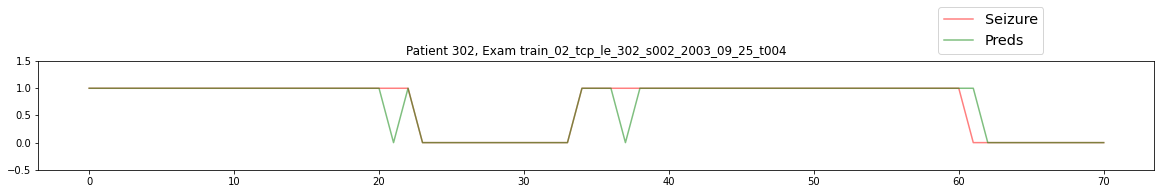

In [142]:
dataset = xqrs_clean_lag_120

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

test_data = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key.isin(keys[:2] + keys[-2:]))]
#score, model = simple_ml(test_data, XGBClassifier())
model = simple_ml_no_train(test_data, XGBClassifier())
preds = model.predict(dataset[dataset.Key.isin(keys[2:4])].iloc[:, 1:-1])
plt.figure(1, figsize = (20,2))

plt.title('Patient %s, Exam %s' % (patient, test_exam))
plt.plot(dataset[dataset.Key.isin(keys[2:4])].label.tolist(), color='red', alpha=0.5, label="Seizure")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
plt.ylim((-0.5, 1.5))
plt.show()

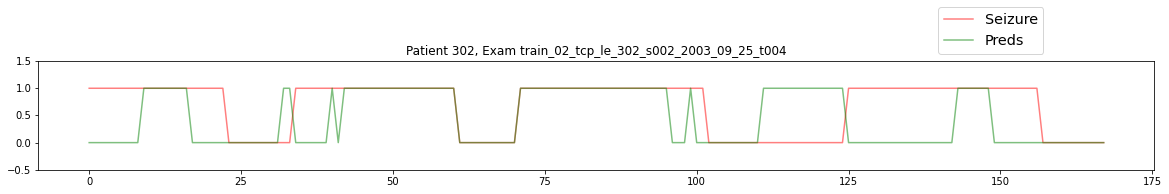

In [125]:
dataset = xqrs_clean_lag_120

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()


test_data = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key.isin(keys[:-4]))]
#score, model = simple_ml(test_data, XGBClassifier())
model = simple_ml_no_train(test_data, XGBClassifier())
preds = model.predict(dataset[dataset.Key.isin(keys[-4:])].iloc[:, 1:-1])
plt.figure(1, figsize = (20,2))

plt.title('Patient %s, Exam %s' % (patient, test_exam))
plt.plot(dataset[dataset.Key.isin(keys[-4:])].label.tolist(), color='red', alpha=0.5, label="Seizure")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
plt.ylim((-0.5, 1.5))
plt.show()

### 1. test no lag

In [112]:
# 12941, 302 -> XGB no train

In [200]:
patient = '675'

In [44]:
from functions import simple_ml
from sklearn.ensemble import RandomForestClassifier

In [45]:
np.arange(50, 201, 25)

array([ 50,  75, 100, 125, 150, 175, 200])

In [46]:
from functions import simple_ml_no_train


f1:  0.0
Sensitivity:  0.0
Specificity:  1.0


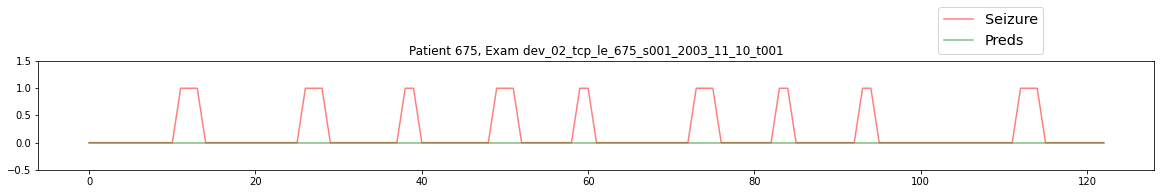


f1:  0.0
Sensitivity:  0.0
Specificity:  1.0


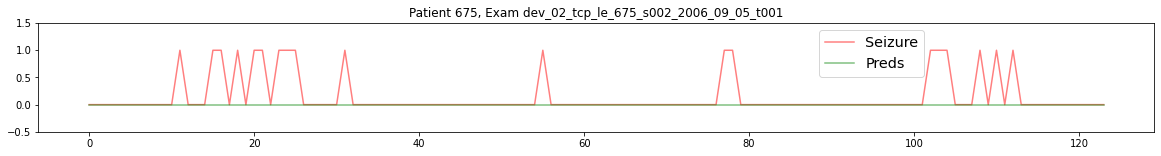

In [212]:
keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys:
    test_exam = key
    test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains(patient)) & (xqrs_clean_imputed.Key != test_exam)]
    #score, model = simple_ml(test_data, XGBClassifier())
    model = simple_ml_no_train(test_data, SVC())
    preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].iloc[:, 1:-1])
    cm = confusion_matrix(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].label, preds)
    print()
    print('f1: ', f1_score(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].label, preds))

    try:
        print('Sensitivity: ', cm[1][1] / (cm[1][0] + cm[1][1]))
    except IndexError:
        print('Sensitivity: ', 0)

    try:
        print('Specificity: ', cm[0][0] / (cm[0][0] + cm[0][1]))
    except IndexError:
        print('Specificity: ', 0)

    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

In [210]:
from sklearn.svm import SVC


f1:  0.0
Sensitivity:  0.0
Specificity:  1.0


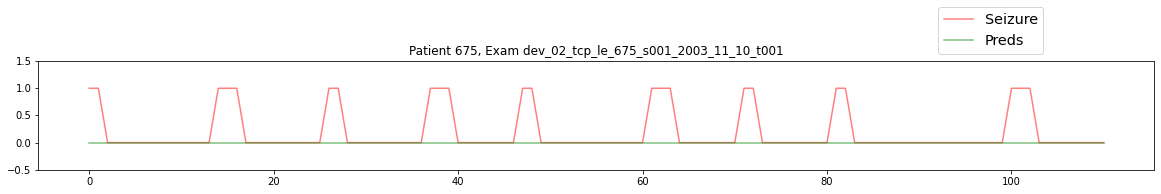


f1:  0.0
Sensitivity:  0.0
Specificity:  1.0


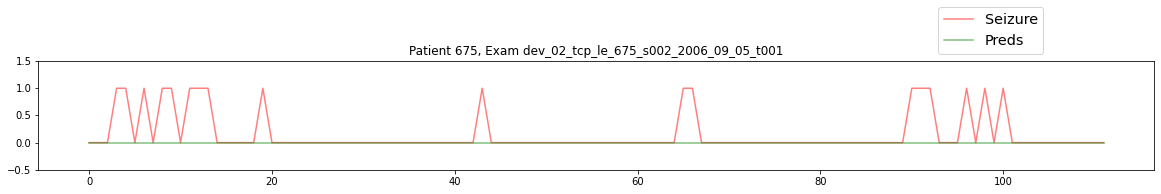

In [211]:
dataset = xqrs_clean_lag_120

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys:
    test_exam = key
    test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)]
    model = simple_ml_no_train(test_data_lag, SVC())
    #score, model = simple_ml(test_data_lag, XGBClassifier())
    preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])

    cm = confusion_matrix(dataset[dataset.Key == test_exam].label, preds)
    print()
    print('f1: ', f1_score(dataset[dataset.Key == test_exam].label, preds))

    try:
        print('Sensitivity: ', cm[1][1] / (cm[1][0] + cm[1][1]))
    except IndexError:
        print('Sensitivity: ', 0)

    try:
        print('Specificity: ', cm[0][0] / (cm[0][0] + cm[0][1]))
    except IndexError:
        print('Specificity: ', 0)

    plt.figure(1, figsize = (20,2))

    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(dataset[dataset.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

In [190]:
params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [2, 8, 15, None],
    'classifier__min_samples_split': [3, 7],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__class_weight': [{0:0.3, 1:0.7}, {0:0.2, 1:0.8}]
}

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   22.5s finished


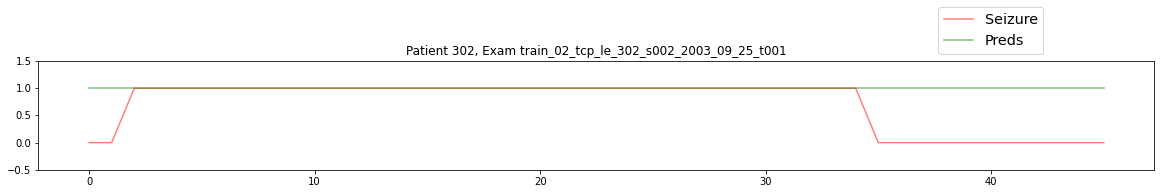

In [191]:
keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys[2:3]:
    test_exam = key
    test_data = xqrs_clean_imputed[(xqrs_clean_imputed.Key.str.contains(patient)) & (xqrs_clean_imputed.Key != test_exam)]
    score, model = simple_ml(test_data, RandomForestClassifier(), params, grid=True)
    #model = simple_ml_no_train(test_data, DecisionTreeClassifier())
    preds = model.predict(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].iloc[:, 1:-1])
    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

In [192]:
dataset = xqrs_clean_lag_60

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys[17:19]:
    test_exam = key
    test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)]
    #model = simple_ml_no_train(test_data_lag, XGBClassifier())
    score, model = simple_ml(test_data_lag, RandomForestClassifier(), params, grid=True)
    preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])
    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(dataset[dataset.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

# Clean One

In [50]:
from sklearn.metrics import f1_score, confusion_matrix


f1:  0.27941176470588236
Sensitivity:  0.6785714285714286
Specificity:  0.07291666666666667



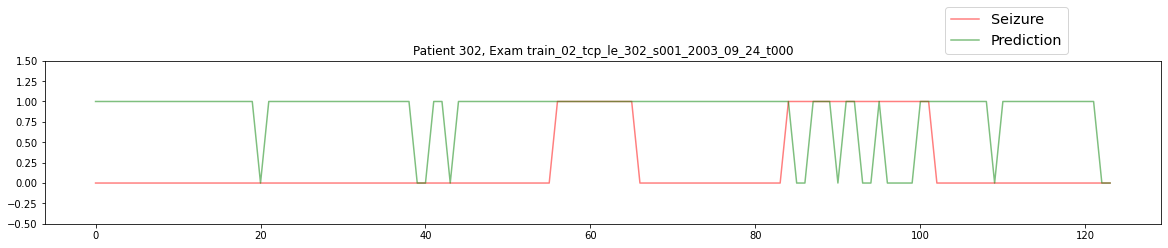


f1:  0.907488986784141
Sensitivity:  0.9809523809523809
Specificity:  0.3448275862068966



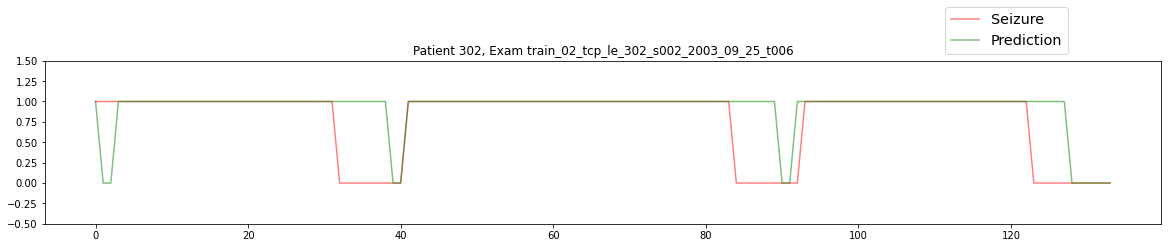


f1:  0.9777777777777777
Sensitivity:  0.9565217391304348
Specificity:  1.0



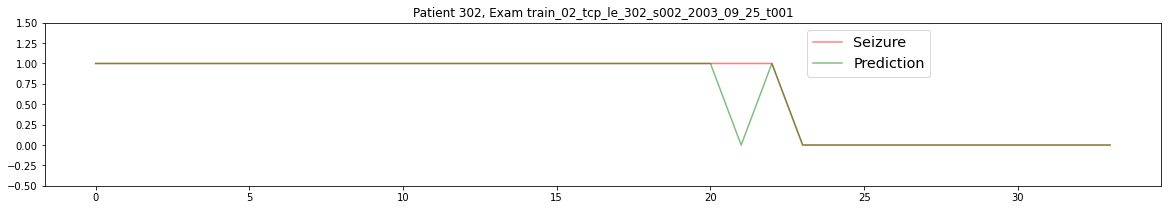

In [194]:
dataset = xqrs_clean_lag_120

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys[:3]:
    test_exam = key
    if dataset[(dataset.Key.str.contains(patient)) & (dataset.Key == test_exam)].label.sum() != 0:
        test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)]
        model = simple_ml_no_train(test_data_lag, XGBClassifier())
        #score, model = simple_ml(test_data_lag, XGBClassifier())
        preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])
        cm = confusion_matrix(dataset[dataset.Key == test_exam].label, preds)
        print()
        print('f1: ', f1_score(dataset[dataset.Key == test_exam].label, preds))
        try:
            print('Sensitivity: ', cm[1][1] / (cm[1][0] + cm[1][1]))
        except IndexError:
            print('Sensitivity: ', 0)

        try:
            print('Specificity: ', cm[0][0] / (cm[0][0] + cm[0][1]))
        except IndexError:
            print('Specificity: ', 0)

        print()
        plt.figure(1, figsize = (20,3))

        plt.title('Patient %s, Exam %s' % (patient, test_exam))
        plt.plot(dataset[dataset.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
        plt.plot(preds, color='green', alpha=0.5, label="Prediction")
        plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
        plt.ylim((-0.5, 1.5))
        plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [66]:
patient= '302'

dataset = xqrs_clean_lag_60

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys:
    test_exam = key
    if dataset[(dataset.Key.str.contains(patient)) & (dataset.Key == test_exam)].label.sum() != 0:
        test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)]
        model = simple_ml_no_train(test_data_lag, XGBClassifier())
        #score, model = simple_ml(test_data_lag, XGBClassifier())
        preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])
        cm = confusion_matrix(dataset[dataset.Key == test_exam].label, preds)
        print()
        print('f1: ', f1_score(dataset[dataset.Key == test_exam].label, preds))
        try:
            print('Sensitivity: ', cm[1][1] / (cm[1][0] + cm[1][1]))
        except IndexError:
            print('Sensitivity: ', 0)

        try:
            print('Specificity: ', cm[0][0] / (cm[0][0] + cm[0][1]))
        except IndexError:
            print('Specificity: ', 0)

        print()

        l = dataset[dataset.Key == test_exam].label.tolist()
        t = [i*10 for i in range(len(l))]
        preds = [p+0.05 for p in preds]


        fig = go.Figure()
        fig.add_trace(go.Scatter(x=t, y=l,
                            mode='lines',
                            name='Crise'))
        fig.add_trace(go.Scatter(x=t, y=preds,
                            mode='markers',
                            name='Prediction'))

        fig.update_layout(
            width=1500,
            height=300,
            paper_bgcolor="lightslategray",
            title_text=f'<b>Patient {patient}</b>',
            font=dict(color="white"))
        fig.show()


f1:  0.0
Sensitivity:  0.0
Specificity:  0.9019607843137255




f1:  0.8907563025210083
Sensitivity:  0.954954954954955
Specificity:  0.27586206896551724




f1:  1.0
Sensitivity:  1.0
Specificity:  1.0




f1:  0.8852459016393442
Sensitivity:  0.8181818181818182
Specificity:  0.9




f1:  0.7857142857142857
Sensitivity:  0.8918918918918919
Specificity:  0.391304347826087




f1:  0.6071428571428572
Sensitivity:  0.4473684210526316
Specificity:  0.9090909090909091



31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
28 ectopic beat(s) have been deleted with malik rule.


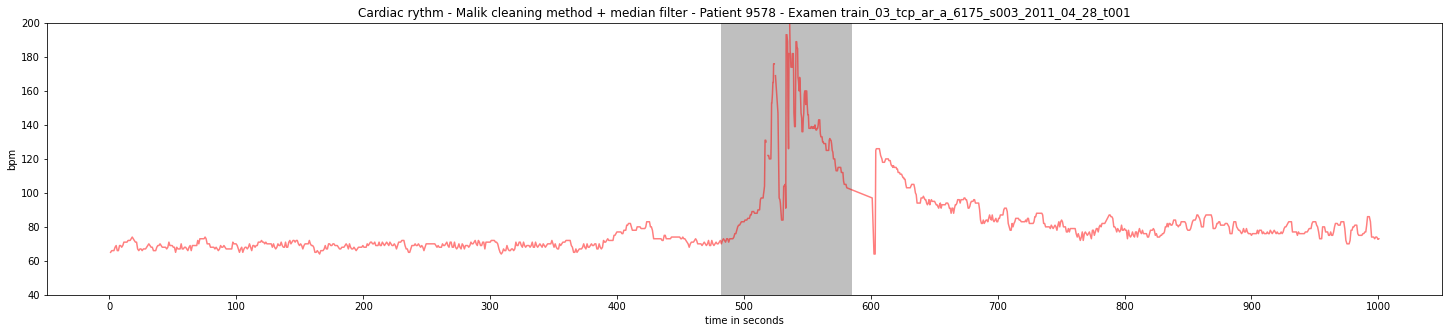

In [38]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy.signal as signal
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values


def get_clean_intervals(rrs, method="malik"):
    # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rrs,
                                                    low_rri=300, high_rri=1800)
    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                       interpolation_method="linear")

    # This remove ectopic beats from signal
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method=method)
    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
    return interpolated_nn_intervals

def to_hr(rr_intervals):
    hr = np.zeros(len(rr_intervals))
    for i in range(0, len(rr_intervals)):
        if math.isnan(rr_intervals[i]):
            hr[i] = np.nan
        else:
            hr[i] = (int)(60 * 1000 / rr_intervals[i])

    return hr

ECG_FILE ="../res-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"
ANNOTATIONS_FILE = "../annot-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"

try:
    data = json.load(open(ECG_FILE, "r"))
    annotations = json.load(open(ANNOTATIONS_FILE, "r"))

    timestamps = {}
    timestamps["xqrs"] = []

    for key in timestamps.keys():
        timestamps[key] = np.cumsum(data[key]["rr_intervals"][1:])
        timestamps[key] = np.append(timestamps[key], timestamps[key][-2])
        timestamps[key] *= 0.001


    clean_rr_intervals = {}
    clean_rr_intervals["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"])

    clean_hr = {}
    clean_hr["xqrs"] = to_hr(clean_rr_intervals["xqrs"])

    hr_median ={}
    hr_median["xqrs"] = signal.medfilt(clean_hr["xqrs"], 5)

    # Clean RR intervals with Malik + median filter
    plt.figure(1, figsize = (25,5))
    plt.ylim((40, 200))
    plt.title(f"Cardiac rythm - Malik cleaning m302ethod + median filter - Patient 9578 - Examen {test_exam}")
    plt.xlabel("time in seconds")
    plt.ylabel("bpm")
    plt.xticks(np.arange(0, 1001, 100))
    plt.plot(timestamps["xqrs"], hr_median["xqrs"], color='red', alpha=0.5, label="xqrs")
    for seizure in annotations["seizure"]:
        plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)

    #for z, j in enumerate(range(50, len(preds)*10, 10)):
        #plt.axvspan(j, (j + 10), facecolor='blue', alpha=0.4 * preds[z])

    #plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')

    plt.show()

except Exception as e:
    print(e)
    print("Error")

In [34]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy.signal as signal
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values

In [35]:
import plotly.graph_objects as go

In [36]:
def get_clean_intervals(rrs, method="malik"):
    # This remove outliers from signal
    rr_intervals_without_outliers = remove_outliers(rr_intervals=rrs,
                                                    low_rri=300, high_rri=1800)
    # This replace outliers nan values with linear interpolation
    interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                       interpolation_method="linear")

    # This remove ectopic beats from signal
    nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method=method)
    # This replace ectopic beats nan values with linear interpolation
    interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
    return interpolated_nn_intervals

def to_hr(rr_intervals):
    hr = np.zeros(len(rr_intervals))
    for i in range(0, len(rr_intervals)):
        if math.isnan(rr_intervals[i]):
            hr[i] = np.nan
        else:
            hr[i] = (int)(60 * 1000 / rr_intervals[i])

    return hr

In [39]:



ECG_FILE ="../res-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"
ANNOTATIONS_FILE = "../annot-v0_4/dev/01_tcp_ar/095/00009578/s004_2013_03_01/00009578_s004_t001.json"


data = json.load(open(ECG_FILE, "r"))
annotations = json.load(open(ANNOTATIONS_FILE, "r"))

timestamps = {}
timestamps["xqrs"] = []

for key in timestamps.keys():
    timestamps[key] = np.cumsum(data[key]["rr_intervals"][1:])
    timestamps[key] = np.append(timestamps[key], timestamps[key][-2])
    timestamps[key] *= 0.001


clean_rr_intervals = {}
clean_rr_intervals["xqrs"] = get_clean_intervals(data["xqrs"]["rr_intervals"])

clean_hr = {}
clean_hr["xqrs"] = to_hr(clean_rr_intervals["xqrs"])

hr_median ={}
hr_median["xqrs"] = signal.medfilt(clean_hr["xqrs"], 5)

df = pd.DataFrame({'Temps en sec':timestamps["xqrs"], 'BPM':hr_median["xqrs"]})

fig = px.line(df, x='Temps en sec', y='BPM', template="seaborn")
for seizure in annotations["seizure"]:
    fig.add_trace(go.Scatter(x=[seizure[0], seizure[1]], y=[300, 300], fill='tonexty', name='Crise'))

# Clean RR intervals with Malik + median filter
#plt.figure(1, figsize = (25,5))
#plt.ylim((40, 200))
#plt.title(f"Cardiac rythm - Malik cleaning method + median filter - Patient 9578 - Examen {test_exam}")
#plt.xlabel("time in seconds")
#plt.ylabel("bpm")
#plt.xticks(np.arange(0, 1001, 100))
#plt.plot(timestamps["xqrs"], hr_median["xqrs"], color='red', alpha=0.5, label="xqrs")
#for seizure in annotations["seizure"]:
#    plt.axvspan(seizure[0], seizure[1], facecolor='grey', alpha=0.5)

#for z, j in enumerate(range(50, len(preds)*10, 10)):
    #plt.axvspan(j, (j + 10), facecolor='blue', alpha=0.4 * preds[z])

#plt.legend(bbox_to_anchor=(0.80, 1), loc='upper left', fontsize='x-large')
fig.update_layout(
    width=1500,
    height=500,
    paper_bgcolor="lightslategray",
    title_text='<b>Patient 9578</b>',
    font=dict(color="white")
)
fig.show()


31 outlier(s) have been deleted.
The outlier(s) value(s) are : [238.28125, 253.90625, 277.34375, 246.09375, 214.84375, 253.90625, 222.65625, 218.75, 296.875, 253.90625, 207.03125, 1968.75, 292.96875, 296.875, 265.625, 296.875, 289.0625, 296.875, 238.28125, 218.75, 273.4375, 246.09375, 214.84375, 214.84375, 265.625, 218.75, 242.1875, 203.125, 238.28125, 265.625, 20054.6875]
28 ectopic beat(s) have been deleted with malik rule.


In [79]:
xqrs_clean_imputed.Key.tolist()[:2]

['train_01_tcp_ar_7793_s001_2011_05_27_t001',
 'train_01_tcp_ar_7793_s001_2011_05_27_t001']

In [17]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
l = xqrs_clean_imputed[xqrs_clean_imputed.Key == 'dev_01_tcp_ar_9578_s004_2013_03_01_t001'].label.tolist()
t = [i*10 for i in range(len(l))]

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=l,
                    mode='lines',
                    name='Crise'))

fig.update_layout(
    width=1500,
    height=300,
    paper_bgcolor="lightslategray",
    showlegend=True,
    title_text='<b>Patient 9578</b>',
    font=dict(color="white"))


fig.add_annotation(
        x=500,
        y=1.05,
        xref="x",
        yref="y",
        text="<b>Crise</b>",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#90b2e8",
        opacity=0.8
        )


fig.add_annotation(
        x=300,
        y=0.05,
        xref="x",
        yref="y",
        text="<b>Pas de crise</b>",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=-20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#90b2e8",
        opacity=0.8
        )
fig.show()

In [ ]:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [62]:
(np.arange(0, 1001, 100))

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

# Only csi & Modified_csi

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.3min finished


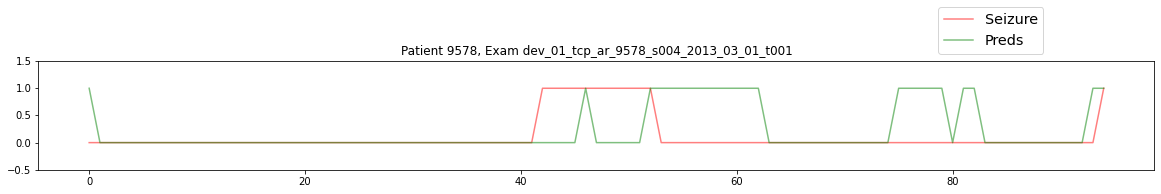

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.3min finished


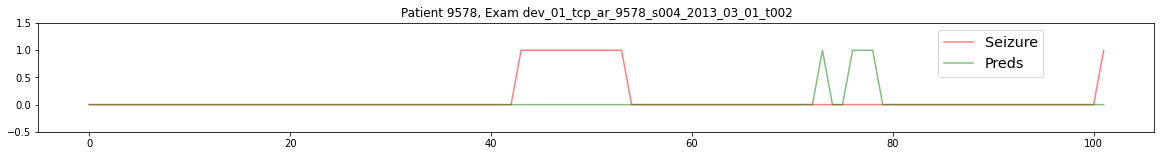

In [73]:
dataset = xqrs_clean_lag_60

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys[17:19]:
    test_exam = key
    test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)][['Key'] + list(dataset.filter(regex='csi')) + ['label']]
    #model = simple_ml_no_train(test_data_lag, XGBClassifier())
    score, model = simple_ml(test_data_lag, RandomForestClassifier(), params, grid=True)
    preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])
    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(dataset[dataset.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

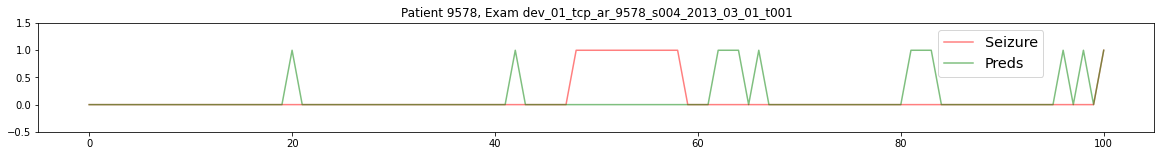

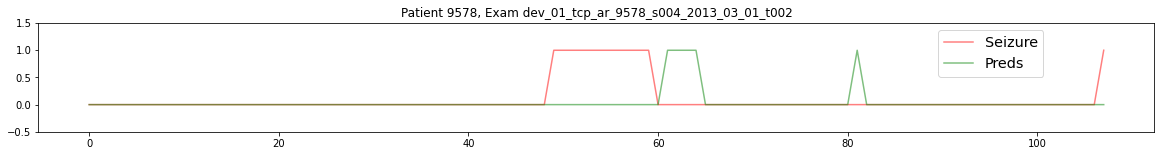

In [75]:
dataset = xqrs_clean_imputed

keys = xqrs_clean_imputed[xqrs_clean_imputed.Key.str.contains(patient)].Key.unique().tolist()

for key in keys[17:19]:
    test_exam = key
    test_data_lag = dataset[(dataset.Key.str.contains(patient)) & (dataset.Key != test_exam)][['Key'] + list(dataset.filter(regex='csi')) + ['label']]
    #model = simple_ml_no_train(test_data_lag, XGBClassifier())
    score, model = simple_ml(test_data_lag, XGBClassifier())
    preds = model.predict(dataset[dataset.Key == test_exam].iloc[:, 1:-1])
    plt.figure(1, figsize = (20,2))

    plt.title('Patient %s, Exam %s' % (patient, test_exam))
    plt.plot(dataset[dataset.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
    plt.plot(preds, color='green', alpha=0.5, label="Preds")
    plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
    plt.ylim((-0.5, 1.5))
    plt.show()

# LSTM

In [213]:
import tensorflow as tf

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [222]:
test_exam = 'train_02_tcp_le_302_s002_2003_09_25_t001'

In [227]:
test_data = xqrs_clean_lag_120[(xqrs_clean_lag_120.Key.str.contains('302')) & (xqrs_clean_lag_120.Key != test_exam)]

In [228]:
df_f = test_data
X = df_f.iloc[:, 1:-1].values
Y = df_f.iloc[:, -1:].values

X_train_fit, X_test_fit, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y, train_size=0.8)

scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train_fit)
X_test_fit = scaler.transform(X_test_fit)

nb_period = 0

#reshape specifique en 3D pour le format attendu pour le LSTM
param2 = int(X_train_fit.shape[1]/(nb_period+1))
X_train_resh = X_train_fit.reshape((X_train_fit.shape[0],nb_period+1,param2))
X_test_resh = X_test_fit.reshape((X_test_fit.shape[0], nb_period+1, param2))
#print(X_train_resh.shape, Y_train.shape, X_test_resh.shape, Y_test.shape)


model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(600, input_shape=(X_train_resh.shape[1], X_train_resh.shape[2])))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1090,
    decay_rate=0.96,
    staircase=True)
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)
model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryCrossentropy(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

history = model.fit(X_train_resh, Y_train, epochs=100, batch_size=36, validation_data=(X_test_resh, Y_test), verbose=1, shuffle=False)

y_pred_train = model.predict_classes(X_train_resh)
y_pred_test = model.predict_classes(X_test_resh)

62 - val_recall_2: 0.9778
Epoch 22/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0350 - binary_crossentropy: 0.0350 - precision_2: 0.9944 - recall_2: 1.0000 - val_loss: 0.1159 - val_binary_crossentropy: 0.1159 - val_precision_2: 0.9362 - val_recall_2: 0.9778
Epoch 23/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0314 - binary_crossentropy: 0.0314 - precision_2: 0.9944 - recall_2: 1.0000 - val_loss: 0.1129 - val_binary_crossentropy: 0.1129 - val_precision_2: 0.9362 - val_recall_2: 0.9778
Epoch 24/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0282 - binary_crossentropy: 0.0282 - precision_2: 0.9944 - recall_2: 1.0000 - val_loss: 0.1102 - val_binary_crossentropy: 0.1102 - val_precision_2: 0.9362 - val_recall_2: 0.9778
Epoch 25/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0253 - binary_crossentropy: 0.0253 - precision_2: 0.9944 - recall_2: 1.0000 - val_loss: 0.1077 - val_binary_crossentropy: 0.1077 - val_precision

In [232]:
p = xqrs_clean_lag_120[xqrs_clean_lag_120.Key == test_exam].iloc[:, 1:-1]

p = StandardScaler().fit_transform(p)

preds = model.predict_classes(p.reshape(p.shape[0], 1, p.shape[1]))

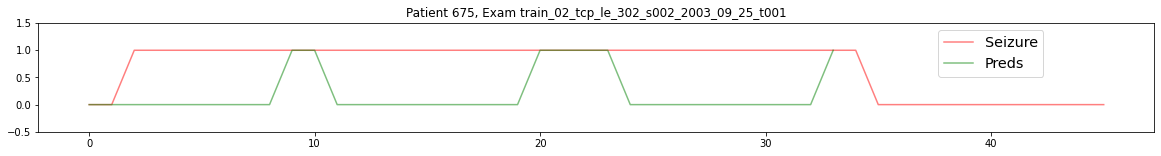

In [233]:
plt.figure(1, figsize = (20,2))

plt.title('Patient %s, Exam %s' % (patient, test_exam))
plt.plot(xqrs_clean_imputed[xqrs_clean_imputed.Key == test_exam].label.tolist(), color='red', alpha=0.5, label="Seizure")
plt.plot(preds, color='green', alpha=0.5, label="Preds")
plt.legend(bbox_to_anchor=(0.80, 1), loc='best', fontsize='x-large')
plt.ylim((-0.5, 1.5))
plt.show()